<a href="https://colab.research.google.com/github/ramonaferrarii/MachineLearning2/blob/main/Code1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Upload the dataset
from google.colab import drive
drive.mount('/content/drive')

folder = 'drive/MyDrive/ML2_FinalProject/'

import pandas as pd
import numpy as np

data = pd.read_excel(folder + 'dataset.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data.head(10)

,source,num1,num2,num3,num4,num5,num6,num7,num8,num9,num10
0,0,2,5,2,5,6,2,1,8,1,3
1,1,1747,1749,1751,1758,1765,1767,1772,1774,1783,1785
2,2,65056,195168,1561344,7806720,31226880,187361280,749445120,6745006080,6745006080,6745006080
3,3,2855,2860,2865,2870,2875,2880,2885,2890,2895,2900
4,4,11440,57200,286000,1430000,7150000,35750000,178750000,893750000,4468750000,22343750000
5,0,4,9,5,4,8,6,6,7,7,2
6,1,1487,1491,1498,1503,1512,1514,1518,1522,1524,1528
7,2,18850,18850,113100,452400,452400,1809600,3619200,3619200,7238400,50668800
8,3,8962,8967,8972,8977,8982,8987,8992,8997,9002,9007
9,4,2870,14350,71750,358750,1793750,8968750,44843750,224218750,1121093750,5605468750


In [3]:
# check if there are missing values
data.isnull().sum()


,0
source,0
num1,0
num2,0
num3,0
num4,0
num5,0
num6,0
num7,0
num8,0
num9,0


In [4]:
print("Dataset format: ",data.shape)


Dataset format:  (500000, 11)


In [5]:
# division of data: X vector and Y target

X = data.iloc[:,1:11].values
Y = data.iloc[:,0].values

# Debugging prints
print('Shape of X: ' + str(X.shape))
print('Shape of Y: ' + str(Y.shape))
print('MIN Vales of Y: ' + str(min(Y)))
print('MAX Vales of Y: ' + str(max(Y)))

Shape of X: (500000, 10)
Shape of Y: (500000,)
MIN Vales of Y: 0
MAX Vales of Y: 4


In [6]:
# normalization of data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [9]:
from random import sample

# remove the order
n  = 1000
nt = 5000-n
mask = np.asarray(sample(range(0,X.shape[0]),n+nt))
X = X[mask,:]
Y = Y[mask]

# division in learning and test
mask = range(0,n)
XL = X[mask,:]
YL = Y[mask]
mask = range(n,n+nt)
XT = X[mask,:]
YT = Y[mask]

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np

# define the grid of parameters
grid_rbf = {
    'C':      np.logspace(-4, 3, 10),
    'kernel': ['rbf'],
    'gamma':  np.logspace(-4, 3, 10)
}

grid_linear = {
    'C':      np.logspace(-4, 3, 10),
    'kernel': ['linear']
}

# store results
results = {}

for kernel_type, grid in [("RBF", grid_rbf), ("Linear", grid_linear)]:
    # GridSearchCV
    M = GridSearchCV(
        estimator=SVC(),
        param_grid=grid,
        cv=10,
        scoring='accuracy'
    )
    # Fit the model
    M.fit(np.asarray(XL), np.asarray(YL))

    # Predict on the test set!
    Yp = M.predict(XT)

    # Store results
    best_params = M.best_params_
    best_score = M.best_score_
    results[kernel_type] = {
        "Best Parameters": best_params,
        "Best Score": best_score,
    }

    print(f"Kernel: {kernel_type}")
    print(f"Best Parameters: {best_params}")
    print(f"Best Score (Accuracy): {best_score}\n")

# Compare kernels
if results["RBF"]["Best Score"] > results["Linear"]["Best Score"]:
    print("The RBF kernel is better.")
else:
    print("The Linear kernel is better.")


Kernel: RBF
Best Parameters: {'C': 1000.0, 'gamma': 1000.0, 'kernel': 'rbf'}
Best Score (Accuracy): 0.7910000000000001

Kernel: Linear
Best Parameters: {'C': 1000.0, 'kernel': 'linear'}
Best Score (Accuracy): 0.6599999999999999

The RBF kernel is better.


In [11]:
# print the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(YT, Yp)
print('%Err: ' + str(100*np.mean(YT != Yp)))
print(cm)

%Err: 35.199999999999996
[[794   0   0   0   0]
 [ 47   0   0 733   0]
 [ 13   0 539  57 188]
 [ 49   0   0 806   0]
 [  3   0 310   8 453]]


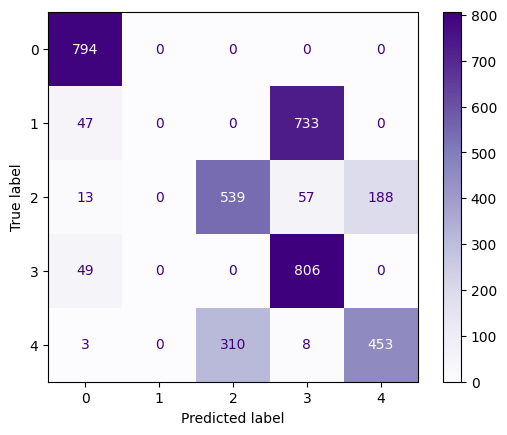

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
conf_matrix=confusion_matrix(YT, Yp)
disp =  ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=M.classes_)
disp.plot(cmap='Purples')
plt.show()
